--- 3 ---


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


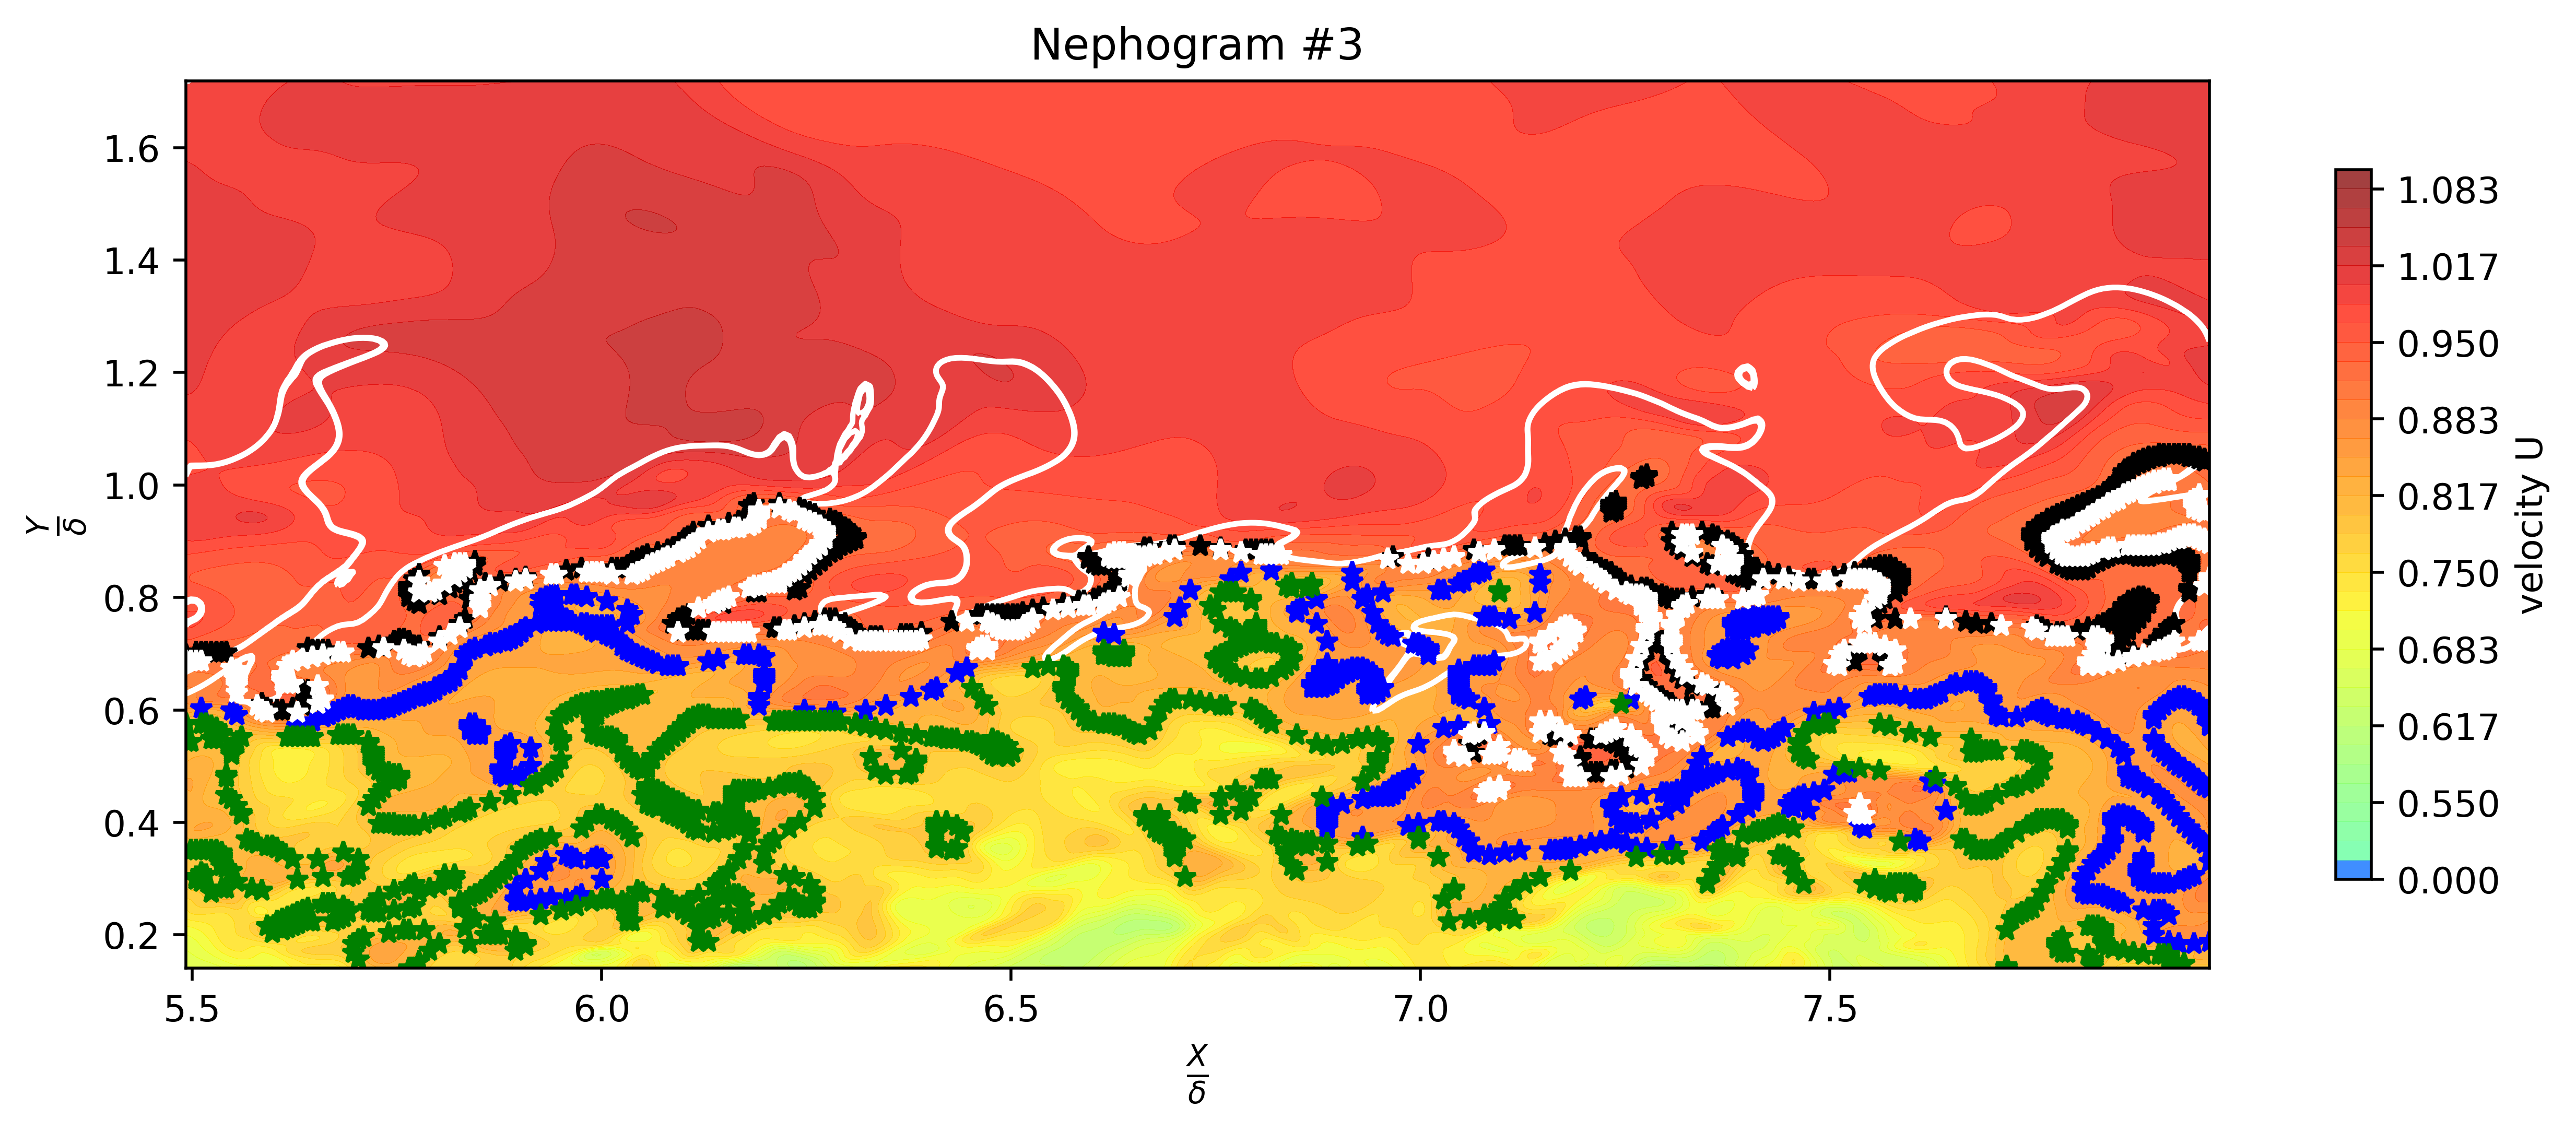

---End---


In [1]:
# Fig 1 
# – location of the points with velocities at KDE peaks 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import time 
from scipy.interpolate import griddata 
from pylab import *
from kde_plus_gmm import kde_plus_gmm 

# --------------------------------
# read data from the original set 
path = '/home/jinyuan/dataB/Wu_BLayer/'
fname = path + 'restart_01013_ydelta_adrian_scalar_omega_uvw_08240_10565.dat'

out = open(
'/home/jinyuan/Dropbox/Projects/Wu_data_BLayer/output_figs/gmm_temp_no_use.dat'
, mode = 'w')

# --------------------------------
# choose the starting position 
# parameters 
btfti = 0.04
binbin = 50

start_z = 1
xnb=3
# --------------------------------

for aa in range(1):

    staz =  aa * 10 + start_z 

    for i in range(1):

        f   = open (fname, mode = 'r')
        jy = i+xnb # ! 
        print('--- %d ---'%jy)
        # --------------------------------
        stat = 0

        nox  = 440 # 440 for 2000 delta^+ 
        stax = stat + nox * (jy-1) # [1,2326] + 440*(jy-1)
        skpx = 2326 - nox 
        endx = stax + nox 

        stay = 105   # [1,400] 
        endy = 300  # 245,249,252,255,258
        noy = endy - stay + 1
#         staz = 1     # Zlabel  #[1,513] which slide

        # --------------------------------
        # skip / go to certain index (I,J，K)
        for i in range(3):
            data = f.readline()

        for ii in range(stax-1):
            data = f.readline()

        for jj in range(stay-1):
            for ii in range(2326):
                data = f.readline()

        for kk in range(staz-1):
            for jj in range(400):
                for ii in range(2326):
                    data = f.readline()

         # --------------------------------
         # get velocity 

        xy    = [[],[]] # original grid
        uu    = [] # original grid
        tt    = []

        small = 1e-15

        for j in range(noy):
            ylb = stay + j + 1 # the grid label in y - direction 
#             print(ylb)
            for i in range(nox):
                data = f.readline()
                lst = data.split()
                x = float(lst[0]) - 10842.4
                y = float(lst[1])
                yod = float(lst[3])
                xod = x / (y+small) * yod
                tl = float(lst[5]) # scalar 
                u = float(lst[7])
                xy[0].append(xod)
                xy[1].append(yod)
                uu.append(u)
                tt.append(tl)

            for i in range(skpx): # skip other x left 
                data = f.readline()

        # --------------------------------
        # interpolation        
        xmax = xy[0][-1]
        xmin = xy[0][0]
        ymax = xy[1][-1]
        ymin = xy[1][0]

        interpx = 400
        interpy = 400

        xi=np.linspace(xmin,xmax,interpx)
        yi=np.linspace(ymin,ymax,interpy)

        XY  = np.meshgrid(xi,yi)
        UU  = griddata((xy[0],xy[1]), uu, (XY[0],XY[1]), method =  'cubic')
        TT  = griddata((xy[0],xy[1]), tt, (XY[0],XY[1]), method =  'cubic')

        # print (LKE)
        # input("Press Enter to continue...")

        uhis = []
        yhis = []
        xhis = []

        for i in range(interpx):
            for j in range(interpy):
                lll = TT[i][j]
                if lll > btfti :
                    uhis.append(UU[i][j])
                    yhis.append(XY[1][i][j])
                    xhis.append(XY[0][i][j])
        
        uhis = np.array(uhis)
        yhis = np.array(yhis)
        xhis = np.array(xhis)
        x1his = xhis[logical_and(uhis>0.920,uhis<0.922)]
        y1his = yhis[logical_and(uhis>0.920,uhis<0.922)]
        x2his = xhis[logical_and(uhis>0.848,uhis<0.850)]
        y2his = yhis[logical_and(uhis>0.848,uhis<0.850)]
        x3his = xhis[logical_and(uhis>0.797,uhis<0.799)]
        y3his = yhis[logical_and(uhis>0.797,uhis<0.799)]
        x4his = xhis[logical_and(uhis>0.909,uhis<0.911)]
        y4his = yhis[logical_and(uhis>0.909,uhis<0.911)]     
#         plt.hist(yhis)
        f.close()
        
        # --- plot 

        rsl = 500
        figure(num=1, figsize=(12.5 * 1, 4.5), dpi=rsl)
        ext = array([0])
        ext = np.append(ext,linspace(0.5,1.1,37))

        thre =[np.arange(0.039,0.040,0.001)][0]
        im      = plt.contourf(XY[0],XY[1],UU,ext,alpha=0.75,cmap=plt.cm.jet)
        isolines = plt.contour(XY[0],XY[1],TT,thre,colors=['white','white']) # plot the BTFTI 
        plt.plot(x1his,y1his,'k*')
        plt.plot(x2his,y2his,'b*')
        plt.plot(x3his,y3his,'g*')
        plt.plot(x4his,y4his,'w*')

        plt.xlabel("$\\frac{X}{\delta}$",fontdict={'family' : 'Calibri', 'size':12})
        plt.ylabel("$\\frac{Y}{\delta}$",fontdict={'family' : 'Calibri', 'size':12})

        # legend
        cbar=plt.colorbar(im, orientation='vertical', shrink=0.8)
        cbar.set_label('velocity U')

        plt.title('Nephogram #%d'%jy)
        plt.savefig(
'/home/jinyuan/Dropbox/Projects/Wu_data_BLayer/output_figs/vel_nephogram_at_Zlabel_%d_X#%d_conditional.svg'%(staz,jy),
dpi=rsl, bbox_inches="tight")
        plt.show()

# --------------------------------
# end 


out.close()

print ('---End---')


--- 2 ---
---End---


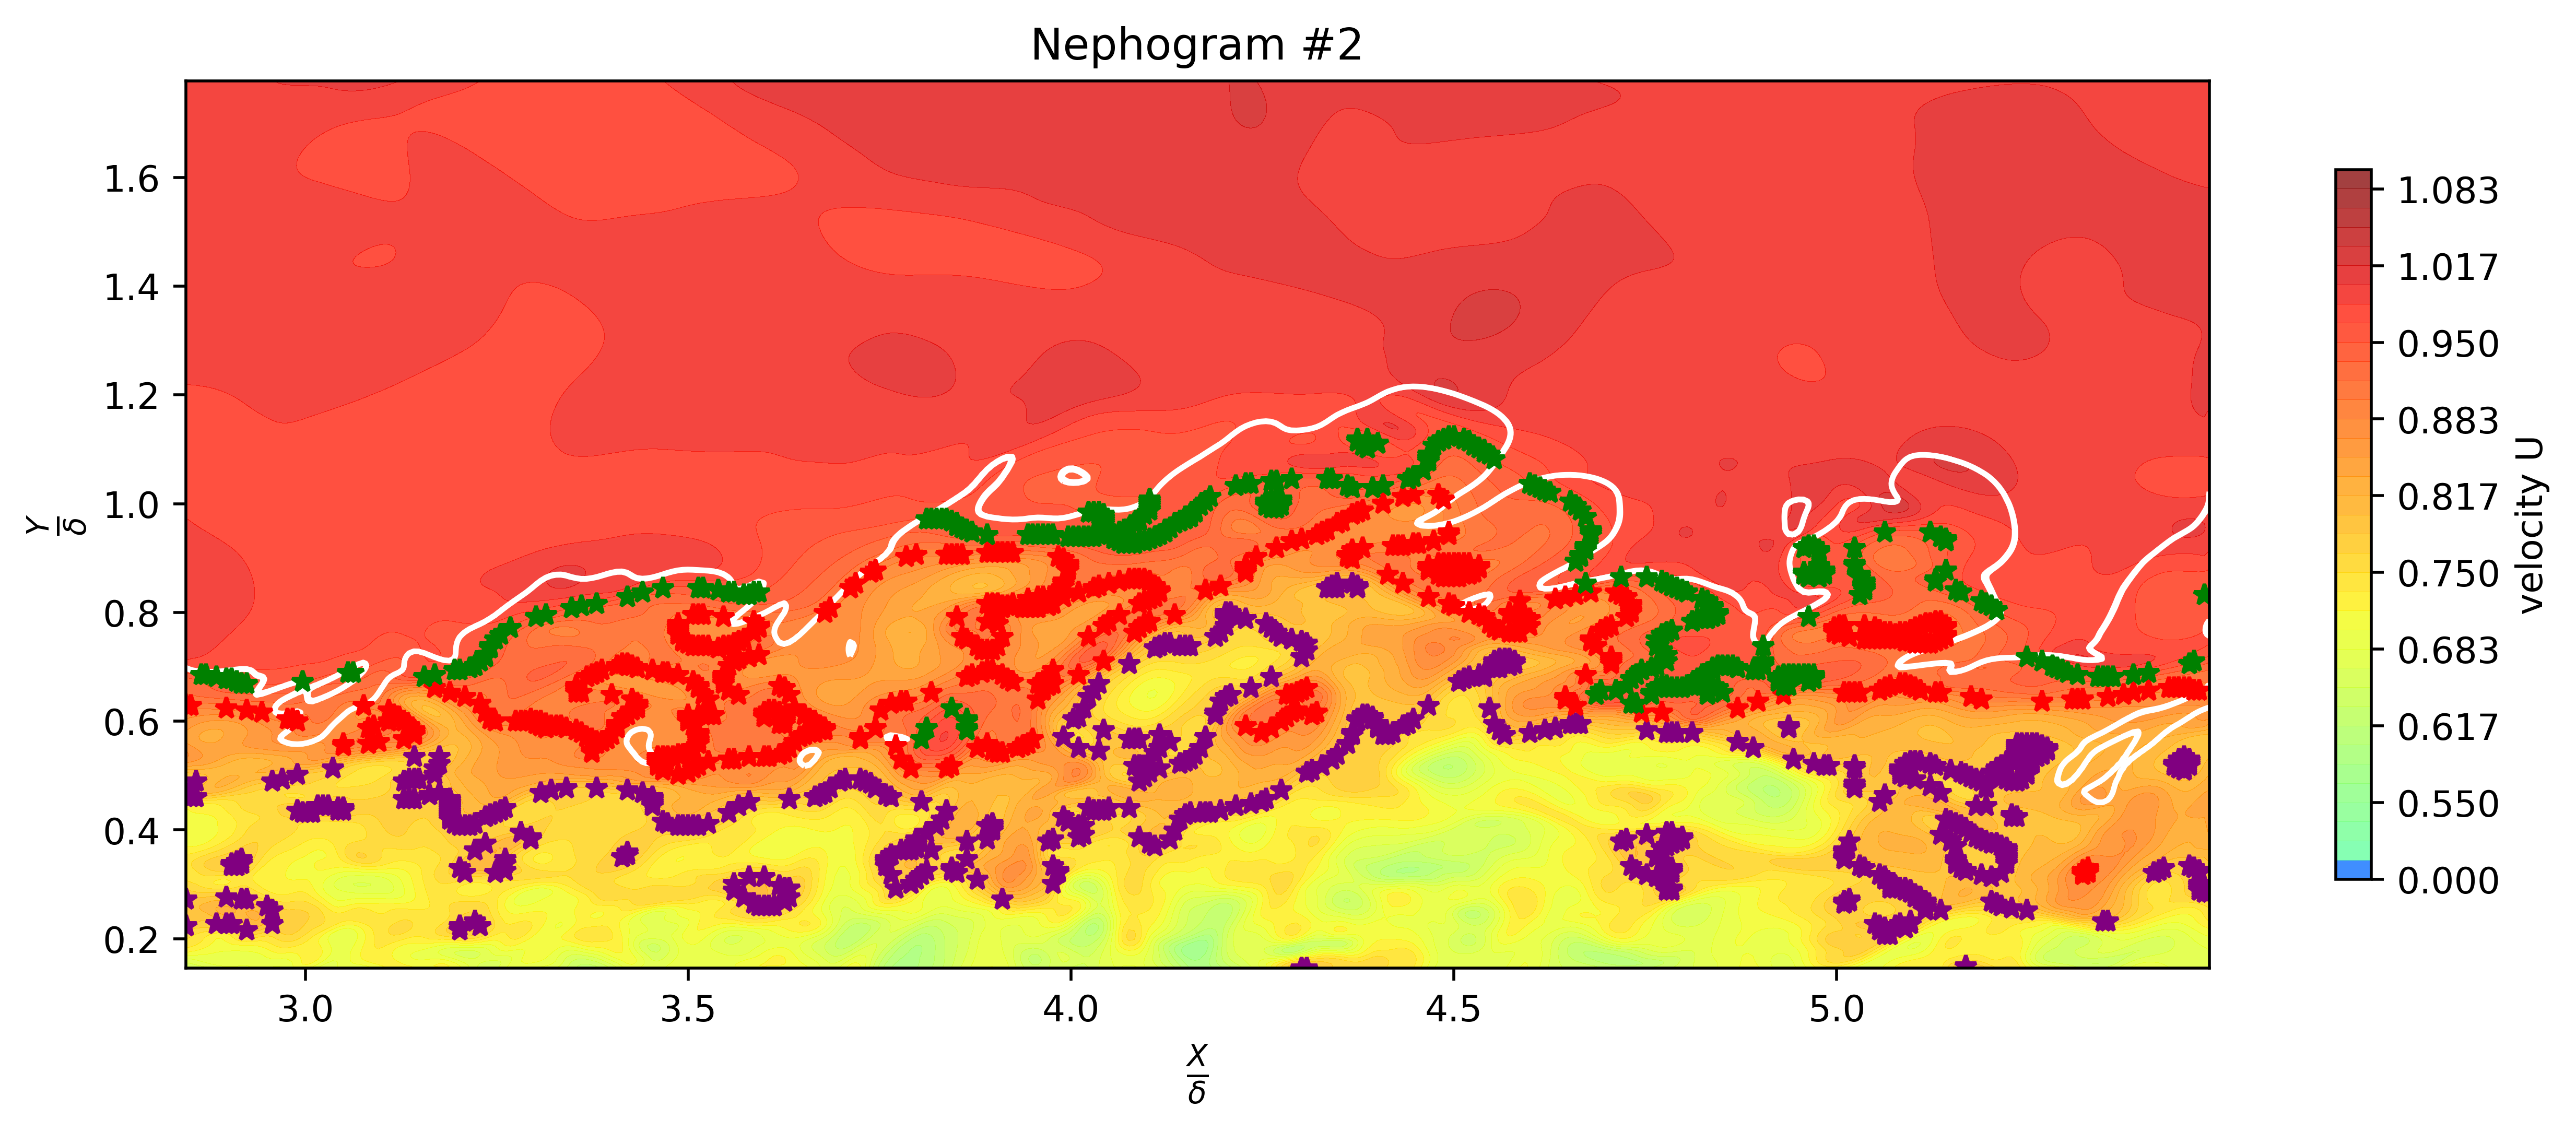

In [4]:
# Fig 2
# – location of the points with velocities at Gaussian peaks 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import time 

from scipy.interpolate import griddata 
from pylab import *
from kde_plus_gmm import kde_plus_gmm 

# --------------------------------
# read data from the original set 

path = '/home/jinyuan/dataB/Wu_BLayer/'
fname = path + 'restart_01013_ydelta_adrian_scalar_omega_uvw_08240_10565.dat'

out = open('/home/jinyuan/Dropbox/Projects/Wu_data_BLayer/output_figs/gmm_temp_no_use.dat'
           , mode = 'w')

# --------------------------------
# choose the starting position 
# parameters 
btfti = 0.04
binbin = 50

start_z = 1
# --------------------------------

for aa in range(1):

    staz =  aa * 10 + start_z 

    for i in range(1):

        f   = open (fname, mode = 'r')

        jy = i+2 # ! 

        print('--- %d ---'%jy)


        # --------------------------------

        stat = 0

        nox  = 440 # 440 for 2000 delta^+ 
        stax = stat + nox * (jy-1) # [1,2326] + 440*(jy-1)
        skpx = 2326 - nox 
        endx = stax + nox 

        stay = 105   # [1,400] 
        endy = 300  # 245,249,252,255,258
        noy = endy - stay + 1

#         staz = 1     # Zlabel  #[1,513] which slide

        # --------------------------------
        # skip / go to certain index (I,J，K)
        for i in range(3):
            data = f.readline()

        for ii in range(stax-1):
            data = f.readline()

        for jj in range(stay-1):
            for ii in range(2326):
                data = f.readline()

        for kk in range(staz-1):
            for jj in range(400):
                for ii in range(2326):
                    data = f.readline()

         # --------------------------------
         # get velocity 

        xy    = [[],[]] # original grid
        uu    = [] # original grid
        tt    = []

        small = 1e-15

        # 数据结构是这样的，X，Y，U，V都是列向量按照扫描方式排列 

        for j in range(noy):
            ylb = stay + j + 1 # the grid label in y - direction 
#             print(ylb)
            for i in range(nox):
                data = f.readline()
                lst = data.split()
                x = float(lst[0]) - 10842.4
                y = float(lst[1])
                yod = float(lst[3])
                xod = x / (y+small) * yod
                tl = float(lst[5]) # scalar 
                u = float(lst[7])
                xy[0].append(xod)
                xy[1].append(yod)
                uu.append(u)
                tt.append(tl)

            for i in range(skpx): # skip other x left 
                data = f.readline()

        # --------------------------------
        # interpolation        
        xmax = xy[0][-1]
        xmin = xy[0][0]
        ymax = xy[1][-1]
        ymin = xy[1][0]

        interpx = 400
        interpy = 400

        xi=np.linspace(xmin,xmax,interpx)
        yi=np.linspace(ymin,ymax,interpy)

        #x,y坐标必须维数一致，且为二维

        XY  = np.meshgrid(xi,yi)

        UU  = griddata((xy[0],xy[1]), uu, (XY[0],XY[1]), method =  'cubic')

        TT  = griddata((xy[0],xy[1]), tt, (XY[0],XY[1]), method =  'cubic')

        # print (LKE)

        # input("Press Enter to continue...")

        uhis = []
        yhis = []
        xhis = []

        for i in range(interpx):
            for j in range(interpy):
                lll = TT[i][j]
                if lll > btfti :
                    uhis.append(UU[i][j])
                    yhis.append(XY[1][i][j])
                    xhis.append(XY[0][i][j])
        
        uhis = np.array(uhis)
        yhis = np.array(yhis)
        xhis = np.array(xhis)
        xxhis = xhis[logical_and(uhis>0.949,uhis<0.951)]
        yyhis = yhis[logical_and(uhis>0.949,uhis<0.951)]
        xxxhis = xhis[logical_and(uhis>0.889,uhis<0.891)]
        yyyhis = yhis[logical_and(uhis>0.889,uhis<0.891)]
        xhis = xhis[logical_and(uhis>0.783,uhis<0.785)]
        yhis = yhis[logical_and(uhis>0.783,uhis<0.785)]
#         plt.hist(yhis)
        f.close()
        
        # --- plot 

        rsl = 500
        figure(num=1, figsize=(12.5 * 1, 4.5), dpi=rsl)
        ext = array([0])
        ext = np.append(ext,linspace(0.5,1.1,37))

        thre =[np.arange(0.039,0.040,0.001)][0]
        im      = plt.contourf(XY[0],XY[1],UU,ext,alpha=0.75,cmap=plt.cm.jet)
        isolines = plt.contour(XY[0],XY[1],TT,thre,colors=['white','white']) # plot the BTFTI 
        plt.plot(xhis,yhis,color='purple', marker='*',linewidth=0)
        plt.plot(xxxhis,yyyhis,'r*')
        plt.plot(xxhis,yyhis,'g*')


        plt.xlabel("$\\frac{X}{\delta}$",fontdict={'family' : 'Calibri', 'size':12})
        plt.ylabel("$\\frac{Y}{\delta}$",fontdict={'family' : 'Calibri', 'size':12})

        # legend
        cbar=plt.colorbar(im, orientation='vertical', shrink=0.8)
        cbar.set_label('velocity U')

        plt.title('Nephogram #%d'%jy)
        plt.savefig(
'/home/jinyuan/Dropbox/Projects/Wu_data_BLayer/output_figs/vel_nephogram_at_Zlabel_%d_X#%d_conditional_peak.svg'%(staz,jy)
, dpi=rsl, bbox_inches="tight")
        plt.show()

# --------------------------------
# end 

out.close()

print ('---End---')


In [2]:
# --------------------------------
# import libraries 


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import time 

from scipy.interpolate import griddata 
from pylab import *
from kde_plus_gmm import kde_plus_gmm  

xmin=0
xmax=1
ymin=0
ymax=1

interpx = 11
interpy = 11
    
xi=np.linspace(xmin,xmax,interpx)
yi=np.linspace(ymin,ymax,interpy)

XY  = np.meshgrid(xi,yi)

print(XY[1][1][1])

0.1


In [25]:
# --------------------------------
# import libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import time 

from scipy.interpolate import griddata 
from pylab import *
from kde_plus_gmm import kde_plus_gmm 

uhis = []
uhis.append(5)
uhis.append(10)
uhis.append(15)

yhis = np.array(uhis)

uhis = np.array(uhis)

print(uhis>5)

print(uhis<15)

print(logical_and(uhis<15,uhis>5))

[False  True  True]
[ True  True False]
[False  True False]
